## Assignment 1
* by Melina Ashali, Jan 18 2024

* due Jan 29, 10pm

### Question 1 - noaa-gsod dataset

In [2]:
# Initializing libraries, dataset
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

plot_colors = ["#264653", "#2A9D8F", "#E9C46A", "#F4A261", "#E76F51"]
df = pd.read_csv("noaa-gosd.csv")
# df[['visib', 'gust']]

#### 1a)
`gust` - Maximum wind gust reported for the day in knots to nearest tenth decimal place

`visib` - Mean visibility for the day in miles rounded to nearest tenth decimal place

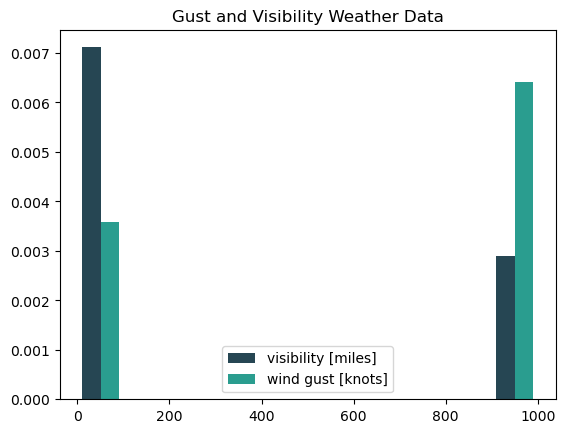

In [3]:
# Q 1b - creating a histogram of visib, and gust
plt.hist([df.visib, df.gust], density=True, label=['visibility [miles]', 'wind gust [knots]'], color=plot_colors[0:2])
plt.title("Gust and Visibility Weather Data")
plt.legend()
plt.show()

# Notice that because the unknown variables are set to 999.9 (>> actual data values), 
# the histogram is not accurate. Actual data is grouped in left bin, unknown data is grouped in right bin. 

In [4]:
# 1b - Replacing all missing values with NaN 
# Missing values identified to be 999.9 for these columns as stated by docs
df_subs = df[['visib','gust']] 
df_subs.replace(999.9, np.nan, inplace=True)
# df_subs.head()

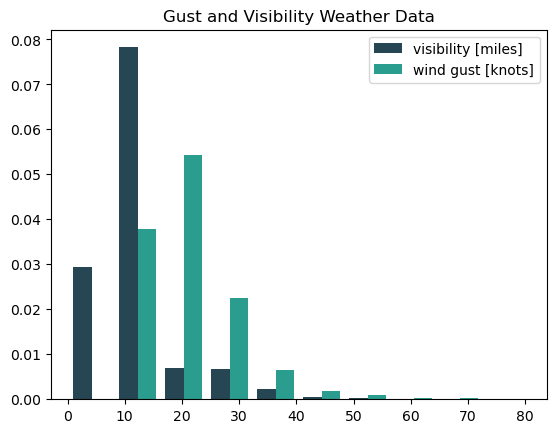

In [5]:
#1c - Creating histogram 
plt.hist([df_subs.visib, df_subs.gust], density=True, label=['visibility [miles]', 'wind gust [knots]'], color=plot_colors[0:2])
plt.title("Gust and Visibility Weather Data")
plt.legend()
plt.show()

### Question 2 - Spotify Tracks DB dataset

In [6]:
spotify = pd.read_csv("SpotifyFeatures.csv")
spotify.info()
# spotify.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [7]:
#1b - Checking uniqueness of 'track_id' column
spotify['track_id'].is_unique
# not unique, because some duplicates have different genres (which is allowed for some reason?)

# Finding number of duplicates
print("Number of duplicated rows is: ", sum(spotify.duplicated(subset='track_id')))

# Creating subset with no duplicates
spotify_no_duplicates = spotify.drop_duplicates(subset=['track_id'], keep=False)

Number of duplicated rows is:  55951


In [8]:
#1c - Finding datatype of each column
spotify_no_duplicates.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [9]:
# 1d - Number of unique genres in dataset
spotify_no_duplicates['genre'].nunique()
# spotify_no_duplicates['genre'].value_counts()  # to see all unique genres

27

In [10]:
# 1e - Finding most popular genre 
spotify_popular_grouped = spotify_no_duplicates.groupby('genre').mean('popularity').sort_values('popularity', ascending=False)
ls_popular_genres = spotify_popular_grouped.index[0:5].tolist()  # pop, rock, rap, hip-hop, dance
spotify_popular = spotify.loc[spotify['genre'].isin(ls_popular_genres)]

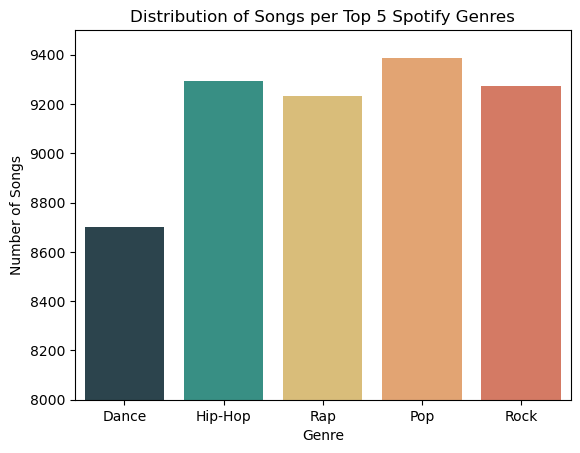

In [11]:
# 1f - Exploring distribution within genre
ax = sns.countplot(data=spotify_popular, 
                    x='genre',
                    palette=plot_colors,
                    )
ax.set(ylim=(8000, 9500))
ax.set(xlabel='Genre', ylabel='Number of Songs', title="Distribution of Songs per Top 5 Spotify Genres")
plt.show()

# This plot indicates that the #1 most popular genre is Pop.

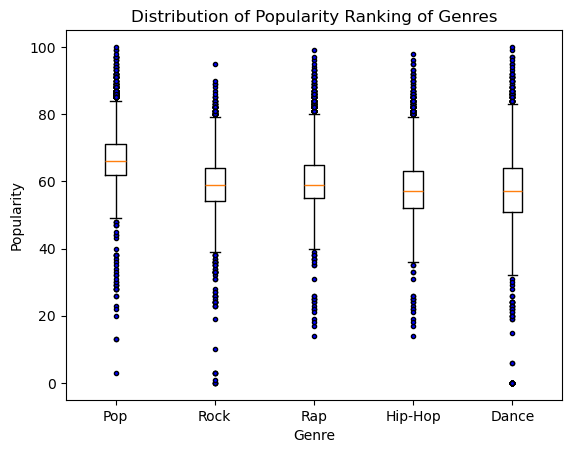

In [12]:
# 1g - Exploring the association betwen genre and popularity
# Creating 5 arrays of popularity data for the 5 genres
data = [spotify_popular[spotify_popular['genre'] == genre]['popularity'] for genre in ls_popular_genres]

# Relative frequency of genre data
ls_count_freq = [spotify_popular.groupby('genre').count().loc[genre, 'track_id'] for genre in ls_popular_genres]
ls_rel_freq = [i/len(spotify_popular) for i in ls_count_freq]

plt.boxplot(data, 
            labels=ls_popular_genres,
            widths=ls_rel_freq,
            flierprops=dict(marker='o', markerfacecolor='b', markersize=3),
            )
plt.title('Distribution of Popularity Ranking of Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

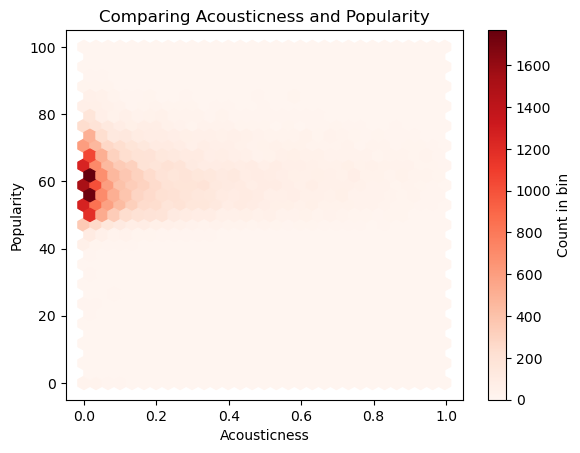

In [28]:
# 1h - Exploring the relationship between acousticness and popularity
plt.hexbin(x=spotify_popular['acousticness'], 
           y=spotify_popular['popularity'],
           cmap='Reds',
           gridsize=30)
plt.colorbar(label='Count in bin')
plt.title('Comparing Acousticness and Popularity')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.show()